In [49]:
import numpy as np
import pandas as pd
import seaborn as sns

In [50]:
data = pd.read_csv('Iris.csv')

In [51]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [52]:
data.rename(columns={'SepalLengthCm':'SL','SepalWidthCm':"SW",'PetalLengthCm':
                    'PL','PetalWidthCm':'PW'},inplace=True)

In [53]:
data.head()

,Id,SL,SW,PL,PW,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [54]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [55]:
iris_versicolor = data[data['Species'] == 'Iris-versicolor']
iris_setosa = data[data['Species'] == 'Iris-setosa']
iris_virginica = data[data['Species'] == 'Iris-virginica']

In [32]:
sp = data.groupby('Species')

C:\Users\SREEMAN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PL', ylabel='Density'>

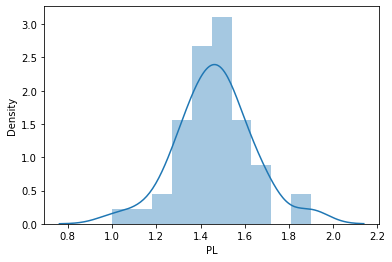

In [33]:
sns.distplot(sp.get_group('Iris-setosa')['PL'])

In [34]:
# to distinguish the species b/w irises

In [35]:
# PL graphs - best feature

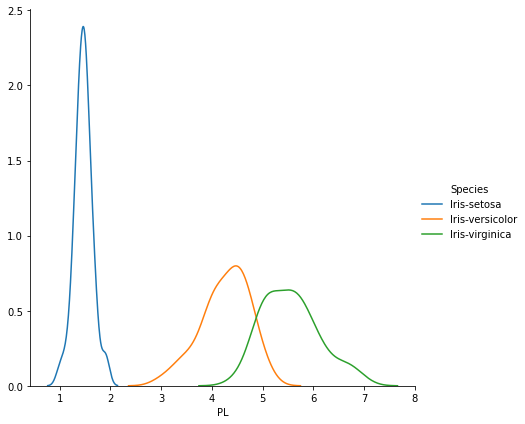

In [36]:
sns.FacetGrid(data,hue='Species',height=6).map(sns.kdeplot,'PL').add_legend()

In [37]:
# PW - 2nd best feature

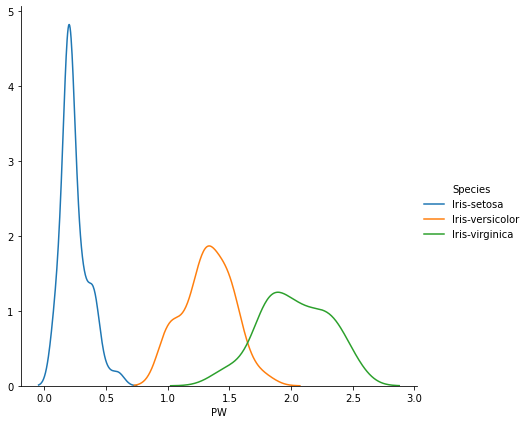

In [38]:
sns.FacetGrid(data,hue='Species',height=6).map(sns.kdeplot,'PW').add_legend()

In [39]:
# SL - 3rd best feature

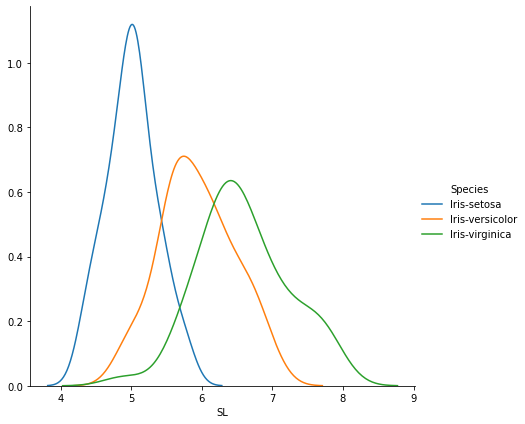

In [40]:
sns.FacetGrid(data,hue='Species',height=6).map(sns.kdeplot,'SL').add_legend()

In [41]:
# SW - worst feature for species distinction

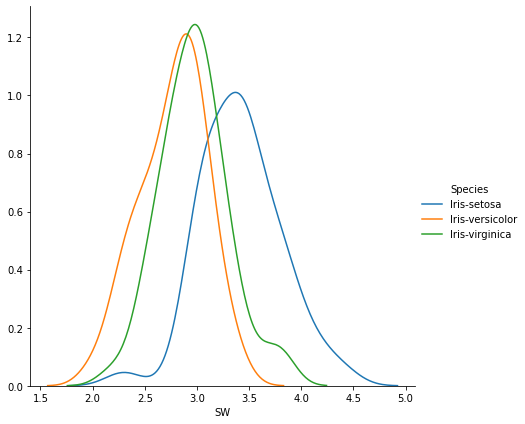

In [42]:
sns.FacetGrid(data,hue='Species',height=6).map(sns.kdeplot,'SW').add_legend()

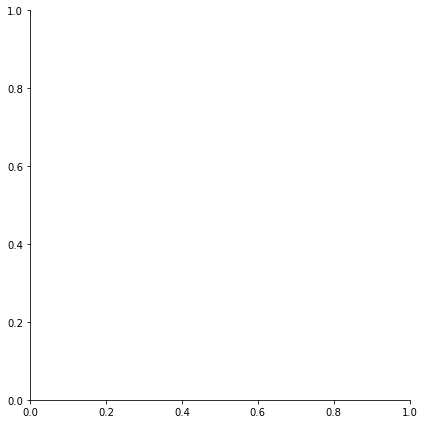

In [43]:
sns.FacetGrid(data,hue='Species',height=6)

In [47]:
# pdf and cdf analysis

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
plt.style.use('fivethirtyeight')
# style for plots

In [108]:
counts,bin_edges = np.histogram(iris_setosa['PL'],bins=10)
print('Counts: ',counts)
print("Bin Edges: ",bin_edges)

Counts:  [ 1  1  2  7 12 14  7  4  0  2]
Bin Edges:  [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


In [109]:
cdf = np.cumsum(pdf)
cdf

array([0.02, 0.12, 0.36, 0.44, 0.62, 0.78, 0.88, 0.92, 0.94, 1.  ])

In [110]:
pdf = counts/sum(counts)
pdf

array([0.02, 0.02, 0.04, 0.14, 0.24, 0.28, 0.14, 0.08, 0.  , 0.04])

Text(0, 0.5, '% counts')

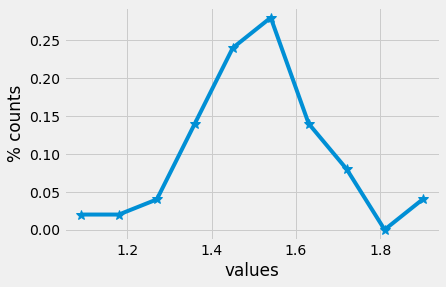

In [114]:
plt.plot(bin_edges[1:],pdf,marker='*',markersize=10)
plt.xlabel('values')
plt.ylabel('% counts')

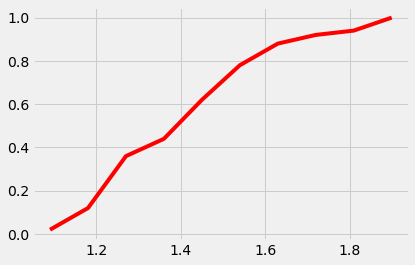

In [112]:
plt.plot(bin_edges[1:],cdf,color='red')

In [93]:
# when we want to distinguish species based on petal length
# we take the pdf graphs of all species.

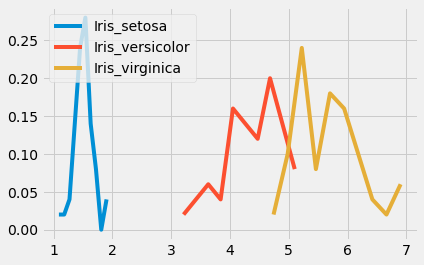

In [94]:
counts,bin_edges = np.histogram(iris_setosa['PL'],bins=10)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Iris_setosa')

counts,bin_edges = np.histogram(iris_versicolor['PL'],bins=10)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Iris_versicolor')

counts,bin_edges = np.histogram(iris_virginica['PL'],bins=10)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label='Iris_virginica')
plt.legend()

In [95]:
# To distinguish b/w versicolor and verginica we set condition that 
# if PL < 5: species = 'Versicolor' else: species='virginica'
# because the probability of virginca increases after 5 while the 
# probability of versicolor decreases and viceversa

In [96]:
# Now if we compare the cdf's we get the accurate analysis of probability
# of correct prediction for versicolor and virginica

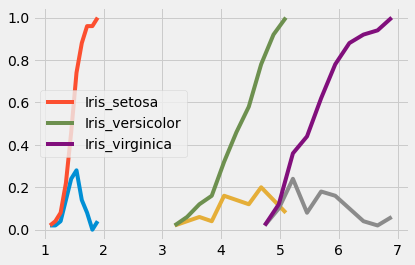

In [102]:
counts,bin_edges = np.histogram(iris_setosa['PL'],bins=10)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf,label='Iris_setosa')

counts,bin_edges = np.histogram(iris_versicolor['PL'],bins=10)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf,label='Iris_versicolor')

counts,bin_edges = np.histogram(iris_virginica['PL'],bins=10)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf,label='Iris_virginica')
plt.legend()

In [ ]:
# here we can say that we have 95% probability of being correct in 
# predicting versicolor as only 5% of cdf is after PL:5 
# and similarly we have 90% probability of correctly predicting 
# virginica as 10% of cdf is below PL:5